In [6]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the Dataset

In [8]:
#Load dataset
(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

# 2. Analyze and explore the dataset

In [10]:
#Analyze the data 
x_train.shape

(60000, 28, 28)

In [11]:
y_train.shape

(60000,)

In [12]:
x_test.shape

(10000, 28, 28)

In [83]:
x_train[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# 2.1 plot sample data to get a better visual representation

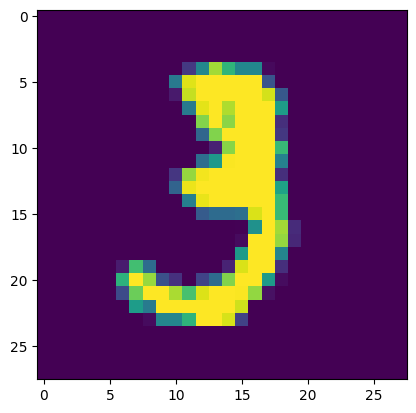

In [15]:
#plot sample data to get a better visual representation
plt.imshow(x_train[10])
plt.show()

#  2.2 Check the respective image label

In [17]:
# Check the respective image label
y_train[10]

3

In [18]:
x_train.shape

(60000, 28, 28)

In [19]:
len(x_train)

60000

#  3. Normalize the pixel data

In [31]:
#Normalized pixel data
x_train = x_train/255
x_test = x_test/255

In [85]:
x_train[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#  4. Flattening the images

In [36]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_train_flattened.shape

(60000, 784)

In [38]:
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

# 5.1 Building the first Model with a single Dense Layer

In [41]:

model = keras.Sequential(
    [
        keras.layers.Dense(10, input_shape= (784,) ,activation='sigmoid')
    ]
)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #we have categories of outputs 1-9
             metrics=['accuracy']
             )
model.fit(x_train_flattened,y_train,epochs=5)


C:\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 771us/step - accuracy: 0.8183 - loss: 0.7104
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 756us/step - accuracy: 0.9149 - loss: 0.3097
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - accuracy: 0.9207 - loss: 0.2862
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.9246 - loss: 0.2667
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step - accuracy: 0.9260 - loss: 0.2671


# 5.2 Evaluating the model

In [44]:
#Evaluating the model
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.9161 - loss: 0.3025


[0.26626142859458923, 0.9265999794006348]

# 5.3 Testing the model with a sample prediction

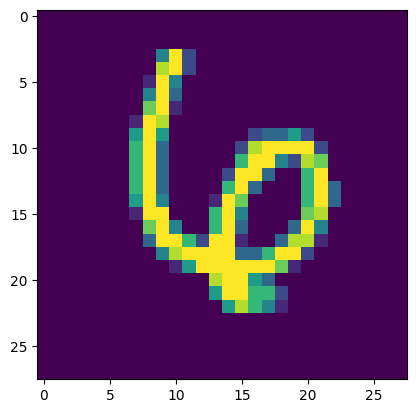

In [47]:
plt.imshow(x_test[22])

In [49]:
k = model.predict(x_test[22].reshape(1,784)) 
np.argmax(k)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


6

In [51]:
y_peddicted_Labels = [np.argmax(i) for i in model.predict(x_test_flattened)]


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step


# 5.4 Building a confusion metrix to evaluate he performance 

In [54]:
# Building a confusion metrix to evaluate he performance 
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_peddicted_Labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    2,    0,    5,    7,    2,    2,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   3,    9,  937,   18,    6,    3,   13,    9,   29,    5],
       [   2,    0,   17,  928,    0,   26,    2,   11,   15,    9],
       [   1,    1,    5,    2,  911,    0,    9,    4,    9,   40],
       [   7,    3,    5,   35,    7,  780,   13,    6,   30,    6],
       [  10,    3,    8,    1,    7,   14,  910,    2,    3,    0],
       [   1,    5,   23,    9,    6,    0,    0,  944,    3,   37],
       [   6,    9,    6,   33,    9,   26,    9,   10,  858,    8],
       [  10,    7,    1,   12,   25,    8,    0,   17,    4,  925]])>

In [56]:
import seaborn as sns

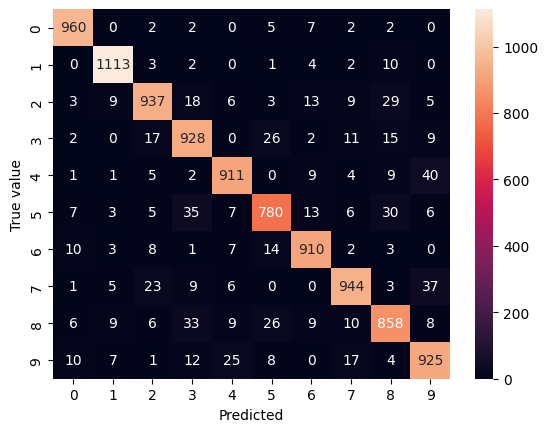

In [58]:
#Plotting the confusion matix using seaborn library for a better visual representation
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True value")
plt.show()

# 6.1 Building the second Model with a hidden layer (with 100 neurones) 

In [61]:
#building another model with hidden layer
model2 = keras.Sequential(
    [
        #without keras flatten layer, because we are manually flattening the image to (x_train_flattened)
        #100 is hidden layer neurones and activation function is relu 
        keras.layers.Dense(100, input_shape= (784,) ,activation='relu'),
        keras.layers.Dense(10 ,activation='sigmoid')
    ]
)

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #we have categories of outputs 1-9
             metrics=['accuracy']
             )
model2.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5


C:\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8780 - loss: 0.4451
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9593 - loss: 0.1363
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9736 - loss: 0.0908
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9803 - loss: 0.0683
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9829 - loss: 0.0547


# 6.2 Evaluating the model

In [64]:
# evaluate model for training data
model2.evaluate(x_train_flattened, y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 776us/step - accuracy: 0.9860 - loss: 0.0443


[0.04461903125047684, 0.9861500263214111]

In [66]:
# evaluate model for testing data
model2.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.9682 - loss: 0.1031


[0.08758094906806946, 0.9733999967575073]

In [68]:
# Building a confusion metrice to evaluate he performance 
y_peddicted_Labels = [np.argmax(i) for i in model2.predict(x_test_flattened)]
cm1 = tf.math.confusion_matrix(labels=y_test,predictions=y_peddicted_Labels)
cm1

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    0,    2,    1,    3,    0,    2,    1,    0],
       [   0, 1120,    4,    1,    0,    0,    3,    1,    6,    0],
       [   5,    0, 1009,    0,    2,    0,    2,    8,    6,    0],
       [   0,    0,    6,  977,    0,   18,    0,    5,    4,    0],
       [   2,    1,    4,    0,  971,    0,    1,    1,    0,    2],
       [   2,    0,    0,    1,    2,  881,    3,    1,    2,    0],
       [   7,    3,    3,    1,    6,   14,  920,    0,    4,    0],
       [   1,    7,   10,    2,    2,    0,    0, 1000,    1,    5],
       [   7,    2,    3,    6,   10,   10,    1,    7,  925,    3],
       [   4,    4,    1,    5,   17,    9,    1,    5,    3,  960]])>

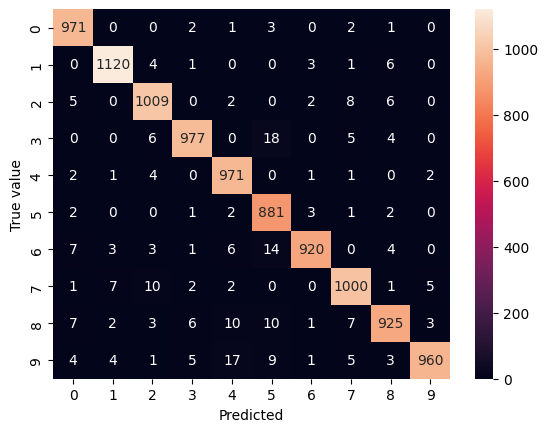

In [70]:
#Plotting the confusion matix using seaborn library for a better visual representation
sns.heatmap(cm1, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True value")
plt.show()

# 7.1 Building the third Model using Flatten and a hidden layer 

In [73]:
#building another model with hidden layer
model3 = keras.Sequential(
    [
        #Flatten layer
        keras.layers.Flatten(input_shape=(28,28)),
  
        keras.layers.Dense(100 ,activation='relu'),
        keras.layers.Dense(10 ,activation='sigmoid')
    ]
)

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #we have categories of outputs 1-9
             metrics=['accuracy']
             )
model3.fit(x_train,y_train,epochs=5)

Epoch 1/5


C:\Anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8753 - loss: 0.4452
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9610 - loss: 0.1342
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9723 - loss: 0.0919
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9796 - loss: 0.0665
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9850 - loss: 0.0512


# 7.2 Evaluating the model

In [76]:
# Evaluate the model for training data
# using x_train derectly without flattening 
model3.evaluate(x_train, y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.9894 - loss: 0.0381


[0.03898240998387337, 0.9888833165168762]

In [78]:
y_peddicted_Labels = [np.argmax(i) for i in model3.predict(x_test)]
cm3 = tf.math.confusion_matrix(labels=y_test,predictions=y_peddicted_Labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step


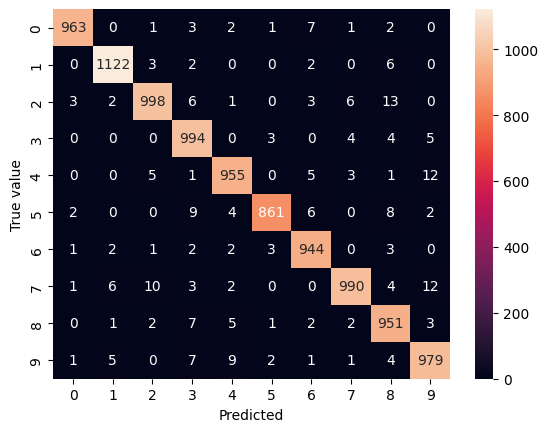

In [80]:
#Plotting the confusion matix using seaborn library for a better visual representation
sns.heatmap(cm3, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True value")
plt.show()